Немного про фондовый рынок Франции:

Euronext Paris — крупнейшая фондовая биржа Франции и часть европейской группы Euronext.

Основные факты:
* Дата основания: 1724 год
* Слияние в Euronext: 2000 год
* Количество акций: более 800 компаний торгуются на Euronext Paris
* Основной индекс: CAC 40 (включает LVMH, Renault, и др.)
* Крупные компании: LVMH, L’Oréal, Hermès, TotalEnergies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.pyplot import figure

In [2]:
# Для визуализации
%config InluneBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

In [3]:
# pip install yfinance --upgrade --no-cache-dir

In [4]:
# Тикеры компаний для выгрузки данных
tickers = ['AB.PA', 'ABCA.PA', 'ABEO.PA', 'ABNX.PA', 'ABVX.PA',
       'ABLD.PA', 'ABO.PA', 'ACAN.PA', 'AC.PA', 'EOS.PA', 'ALDV.PA',
       'ADOC.PA', 'ADP.PA', 'AELIS.PA', 'AKOM.PA', 'AFMBS.PA', 'AFME.PA',
       'AF.PA', 'AI.PA', 'AIR.PA', 'AKW.PA', 'AAA.PA', 'CDA.PA', 'ALO.PA',
       'LTA.PA', 'ALTA.PA', 'AREIT.PA', 'ATE.PA', 'AMPLI.PA', 'AMUN.PA',
       'ANTIN.PA', 'APAM.PA', 'ARAMI.PA', 'MT.PA', 'ARG.PA', 'AKE.PA',
       'ARTE.PA', 'PRC.PA', 'ARTO.PA', 'ARVEN.PA', 'ARVBS.PA', 'ASY.PA',
       'ATEME.PA', 'ATLD.PA', 'ATO.PA', 'AUB.PA', 'AUGR.PA', 'AURE.PA',
       'AVT.PA', 'CS.PA', 'AXW.PA', 'AYV.PA', 'BAIN.PA', 'BALYO.PA',
       'BUI.PA', 'BASS.PA', 'BLC.PA', 'BLV.PA', 'BEN.PA', 'BB.PA',
       'BIG.PA', 'BIM.PA', 'BIOS.PA', 'BLEE.PA', 'BNP.PA', 'BOI.PA',
       'BOL.PA', 'BON.PA', 'BSD.PA', 'EN.PA', 'BVI.PA', 'BUR.PA',
       'CAT31.PA', 'CAFO.PA', 'CBDG.PA', 'CAP.PA', 'CARM.PA', 'CARP.PA',
       'CA.PA', 'COBS1.PA', 'COBS3.PA', 'CO.PA', 'CATG.PA', 'CBOT.PA',
       'CGM.PA', 'CYAD.PA', 'CFI.PA', 'CRI.PA', 'CHSR.PA', 'CDI.PA',
       'CLA.PA', 'CLARI.PA', 'CNV.PA', 'COFA.PA', 'COH.PA', 'ODET.PA',
       'COTY.PA', 'COUR.PA', 'COV.PA', 'COVH.PA', 'CRAP.PA', 'CRAV.PA',
       'CRBP2.PA', 'CIV.PA', 'CRLA.PA', 'CRLO.PA', 'CMO.PA', 'CNDF.PA',
       'CCN.PA', 'CAF.PA', 'CRSU.PA', 'CRTO.PA', 'ACA.PA', 'CROS.PA',
       'BN.PA', 'AM.PA', 'DSY.PA', 'DBV.PA', 'DEEZR.PA', 'DEEZW.PA',
       'DKUPL.PA', 'DBG.PA', 'DPAM.PA', 'EFG.PA', 'EDEN.PA', 'FGR.PA',
       'EKI.PA', 'ELEC.PA', 'EEM.PA', 'ELIOR.PA', 'ELIS.PA', 'EMEIS.PA',
       'ENGI.PA', 'EQS.PA', 'ERA.PA', 'EL.PA', 'ES.PA', 'EFI.PA', 'RF.PA',
       'EAPI.PA', 'ERF.PA', 'ENX.PA', 'ETL.PA', 'EGR.PA', 'EXA.PA',
       'EXN.PA', 'EXE.PA', 'EXENS.PA', 'EXPL.PA', 'FAYE.PA', 'FDJ.PA',
       'FCMC.PA', 'SACI.PA', 'ORIA.PA', 'FGA.PA', 'FOAF.PA', 'FINM.PA',
       'FNTS.PA', 'FIPP.PA', 'FNAC.PA', 'LEBL.PA', 'EURS.PA', 'INEA.PA',
       'FLY.PA', 'SPEL.PA', 'FORE.PA', 'FORSE.PA', 'FRVIA.PA', 'FDE.PA',
       'FREY.PA', 'GALIM.PA', 'GAM.PA', 'GEA.PA', 'GFC.PA', 'GNRO.PA',
       'GNFT.PA', 'SIGHT.PA', 'GET.PA', 'GLO.PA', 'GPE.PA', 'GRVO.PA',
       'CEN.PA', 'INFE.PA', 'GJAJ.PA', 'PARP.PA', 'SFPI.PA', 'GTT.PA',
       'GBT.PA', 'GUI.PA', 'PIG.PA', 'HDF.PA', 'RMS.PA', 'HCO.PA',
       'HDP.PA', 'ICAD.PA', 'IDL.PA', 'IDIP.PA', 'NK.PA', 'IMDA.PA',
       'INF.PA', 'IPH.PA', 'ITP.PA', 'ITXT.PA', 'IVA.PA', 'IPN.PA',
       'IPS.PA', 'JBOG.PA', 'JCQ.PA', 'DEC.PA', 'KOF.PA', 'KER.PA',
       'LI.PA', 'OR.PA', 'LACR.PA', 'MMB.PA', 'LAT.PA', 'LPE.PA',
       'LOUP.PA', 'LSS.PA', 'LR.PA', 'LHYFE.PA', 'LIN.PA', 'FII.PA',
       'LNA.PA', 'LBIRD.PA', 'MC.PA', 'MRM.PA', 'MAAT.PA', 'MDM.PA',
       'MALT.PA', 'MTU.PA', 'IAM.PA', 'MAU.PA', 'MBWS.PA', 'EDI.PA',
       'MEDCL.PA', 'MEMS.PA', 'MERY.PA', 'MRN.PA', 'METEX.PA', 'MMT.PA',
       'ML.PA', 'FMONC.PA', 'MONT.PA', 'MHM.PA', 'NACON.PA', 'NANO.PA',
       'NEOEN.PA', 'NRO.PA', 'NEX.PA', 'NXI.PA', 'NHOA.PA', 'NOKIA.PA',
       'NR21.PA', 'NRG.PA', 'SBT.PA', 'OPM.PA', 'ORA.PA', 'ORAP.PA',
       'OREGE.PA', 'OSE.PA', 'OVH.PA', 'PAR.PA', 'PARRO.PA', 'PSAT.PA',
       'PAT.PA', 'RI.PA', 'PERR.PA', 'PEUG.PA', 'PHXM.PA', 'VACBS.PA',
       'VACBT.PA', 'VAC.PA', 'PLNW.PA', 'PVL.PA', 'PLX.PA', 'POXEL.PA',
       'PROAC.PA', 'PWG.PA', 'PUB.PA', 'QDT.PA', 'RAL.PA', 'GDS.PA',
       'RCO.PA', 'RNO.PA', 'RXL.PA', 'RBT.PA', 'CBR.PA', 'CBE.PA',
       'RBO.PA', 'RUI.PA', 'SK.PA', 'SAF.PA', 'SGO.PA', 'SABE.PA',
       'SAMS.PA', 'SAN.PA', 'DIM.PA', 'SAVE.PA', 'CBSM.PA', 'SU.PA',
       'SCR.PA', 'SCHP.PA', 'SGRO.PA', 'SLCO.PA', 'SELER.PA', 'SEFER.PA',
       'SESG.PA', 'SRP.PA', 'SMCP.PA', 'SFCA.PA', 'GLE.PA', 'SW.PA',
       'SEC.PA', 'SOI.PA', 'LOCAL.PA', 'S30.PA', 'SOLB.PA', 'SOP.PA',
       'SPIE.PA', 'SQI.PA', 'DPT.PA', 'STF.PA', 'STLAP.PA', 'STMPA.PA',
       'SWP.PA', 'SYENS.PA', 'SDG.PA', 'TKTT.PA', 'TAYN.PA', 'TE.PA',
       'TEP.PA', 'TVRB.PA', 'TRACT.PA', 'TERBS.PA', 'TFI.PA', 'TFF.PA',
       'HO.PA', 'THEP.PA', 'TKO.PA', 'TITC.PA', 'TTE.PA', 'EC.PA',
       'TOUP.PA', 'EIFF.PA', 'TNG.PA', 'TRI.PA', 'UBI.PA', 'URW.PA',
       'UNBL.PA', 'FPG.PA', 'FR.PA', 'VK.PA', 'VKBS.PA', 'VLA.PA',
       'VANTI.PA', 'VANBS.PA', 'VIE.PA', 'VRLA.PA', 'VMX.PA', 'VETO.PA',
       'VCT.PA', 'VIL.PA', 'DG.PA', 'VIRP.PA', 'VIRI.PA', 'VTR.PA',
       'VIV.PA', 'VLTSA.PA', 'VRAP.PA', 'VU.PA', 'WAGA.PA', 'WAVE.PA',
       'MF.PA', 'WLN.PA', 'XFAB.PA', 'XIL.PA', 'CV.PA']

## Загрузка данных по дневным ценам акций

In [5]:
import yfinance as yf
import pandas as pd
from datetime import datetime

start_date = '2018-01-01'
end_date = '2018-12-31'

all_data = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Ticker'] = ticker 
    all_data = pd.concat([all_data, data])

all_data.to_csv('~/Downloads/euronext_paris_2018.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AELIS.PA']: 

Ошибки с выгрузкой данных по некоторым тикерам связаны с тем, что тикеры брались со списка торгующихся активов в 2024 году. Некоторые компании вышли на IPO позже 2018 года.

In [6]:
all_data.reset_index(inplace=True)

In [7]:
all_data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2018-01-02,8.50,9.35,8.50,9.10,9.10,229153.0,AB.PA
1,2018-01-03,9.22,9.29,8.76,9.07,9.07,150430.0,AB.PA
2,2018-01-04,9.10,9.24,9.07,9.16,9.16,67989.0,AB.PA
3,2018-01-05,9.50,10.18,9.49,9.95,9.95,661253.0,AB.PA
4,2018-01-08,10.25,10.97,10.08,10.78,10.78,485756.0,AB.PA
...,...,...,...,...,...,...,...,...
84134,2018-12-20,0.20,0.20,0.20,0.20,0.20,0.0,CV.PA
84135,2018-12-21,0.20,0.20,0.20,0.20,0.20,0.0,CV.PA
84136,2018-12-24,0.20,0.20,0.20,0.20,0.20,0.0,CV.PA
84137,2018-12-27,0.20,0.20,0.20,0.20,0.20,0.0,CV.PA


In [8]:
# Уберем из списка активы с нулевым объемом торгов за год
tickers = all_data.groupby('Ticker').agg({'Volume': 'sum'}).query('Volume == 0').index
all_data = all_data.query('Ticker not in @tickers').copy()

In [9]:
# Добавим колонку с логарифмическими дневными доходностями
all_data['log_return'] = all_data.groupby('Ticker')['Close'].transform(lambda x: np.log(x / x.shift(1)))

In [10]:
all_data.iloc[250:260]

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,log_return
250,2018-12-21,3.522,3.552,3.266,3.362,3.362000,134365.0,AB.PA,-0.047061
251,2018-12-24,3.300,3.380,3.192,3.260,3.260000,81479.0,AB.PA,-0.030809
252,2018-12-27,3.210,3.330,3.104,3.184,3.184000,110064.0,AB.PA,-0.023589
253,2018-12-28,3.200,3.300,3.112,3.240,3.240000,45073.0,AB.PA,0.017435
254,2018-01-02,6.300,6.390,6.290,6.330,4.325129,57266.0,ABCA.PA,NaN
255,2018-01-03,6.370,6.400,6.350,6.350,4.338794,46029.0,ABCA.PA,0.003155
256,2018-01-04,6.430,6.480,6.410,6.450,4.407122,82253.0,ABCA.PA,0.015625
257,2018-01-05,6.480,6.560,6.450,6.490,4.434453,73837.0,ABCA.PA,0.006182
258,2018-01-08,6.530,6.630,6.530,6.590,4.502781,87407.0,ABCA.PA,0.015291
259,2018-01-09,6.600,6.660,6.580,6.650,4.543777,59517.0,ABCA.PA,0.009063


In [11]:
all_data['Ticker'].nunique()

325

Для анализа остается 325 активов крупных компаний

## Построение карты активов

In [12]:
# Посчитаем оценки ожидаемых доходностей и стандартных отклонений активов
ms = all_data.groupby('Ticker', as_index=False).agg({'log_return' : ['mean', 'std']})
ms.columns = ms.columns.map('_'.join).str.strip('_')

In [13]:
ms

,Ticker,log_return_mean,log_return_std
0,AAA.PA,-0.002203,0.100253
1,AB.PA,-0.004082,0.037339
2,ABCA.PA,-0.000251,0.010534
3,ABEO.PA,-0.001116,0.019496
4,ABLD.PA,0.001000,0.026573
...,...,...,...
320,VU.PA,-0.002171,0.024181
321,WAVE.PA,-0.001226,0.021931
322,WLN.PA,0.000092,0.020595
323,XFAB.PA,-0.003352,0.029771


In [14]:
# Найдем Парето оптимальные активы
ms_sorted = ms.sort_values(by='log_return_mean', ascending=False)

pareto_optimal = []
min_variance = float('inf')

for index, row in ms_sorted.iterrows():
    if row['log_return_std'] <= min_variance:
        pareto_optimal.append(row)
        min_variance = row['log_return_std']

pareto_optimal_df = pd.DataFrame(pareto_optimal, columns=ms.columns)
pareto_optimal_tickers = pareto_optimal_df['Ticker'].values

In [15]:
pareto_optimal_df

,Ticker,log_return_mean,log_return_std
33,AUGR.PA,0.002314,0.052111
217,NEOEN.PA,0.002002,0.017429
65,CBE.PA,0.001423,0.015261
90,CRLA.PA,0.000769,0.007641
75,CIV.PA,0.000711,0.005678
62,CAT31.PA,0.000339,0.005258
291,TAYN.PA,0.000029,0.000464


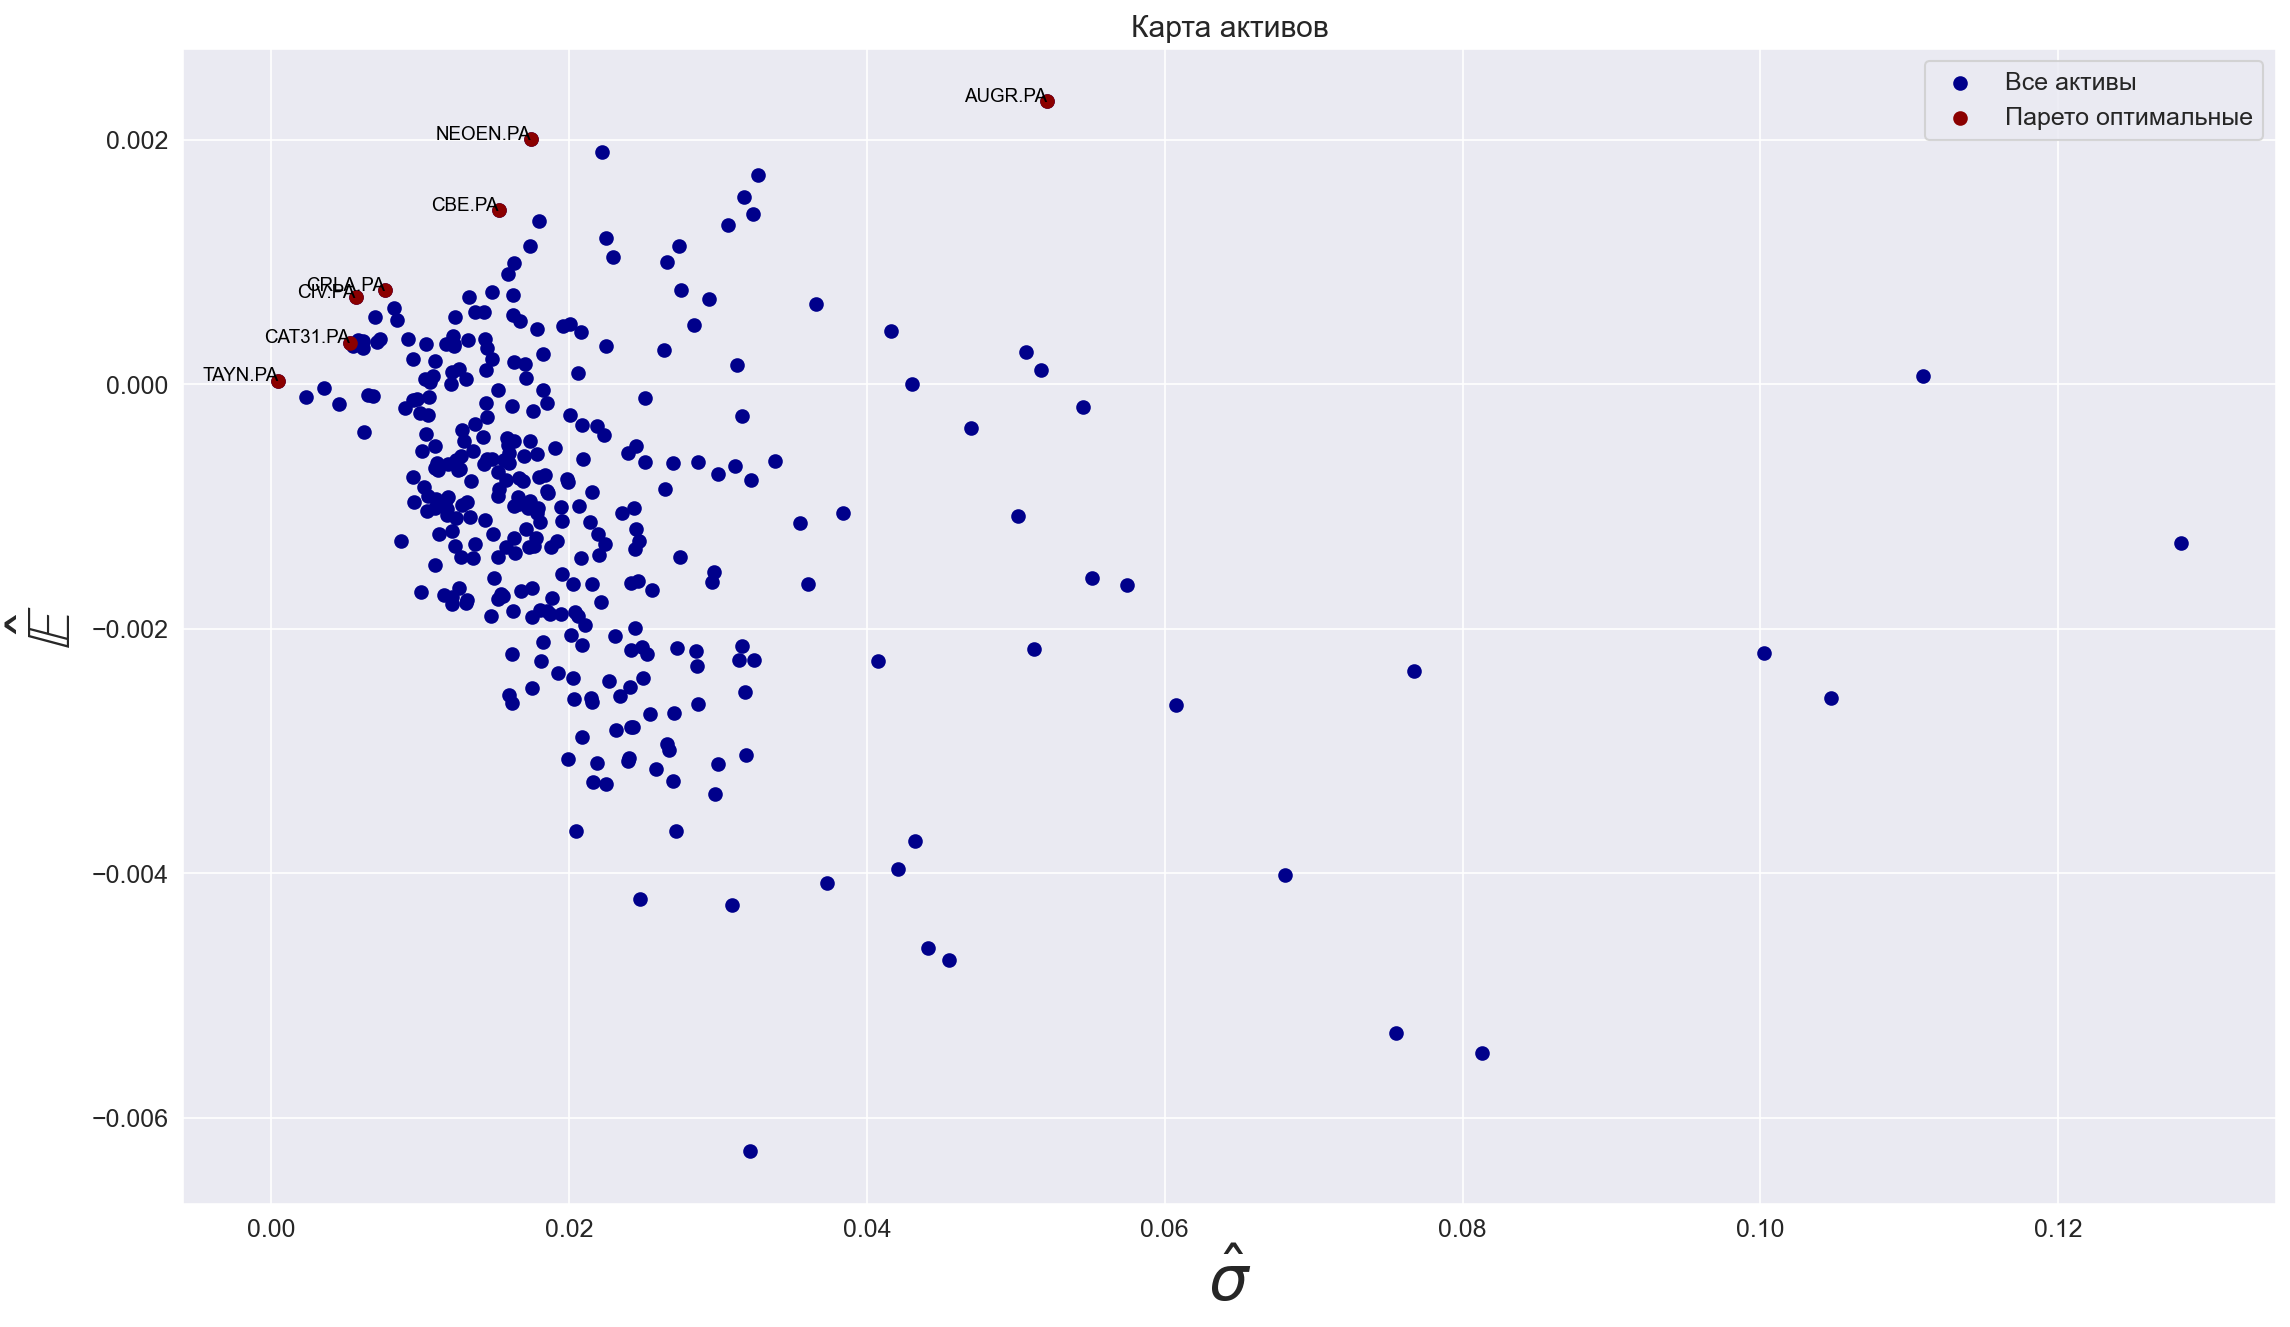

In [16]:
# Карта активов
figure(figsize=(18, 10), dpi=150)

plt.scatter(ms['log_return_std'], ms['log_return_mean'], color='darkblue', label='Все активы')

pareto_tickers = pareto_optimal_df['Ticker']
highlight = ms[ms['Ticker'].isin(pareto_tickers)]

plt.scatter(highlight['log_return_std'], highlight['log_return_mean'], color='darkred', label='Парето оптимальные')

for i, row in highlight.iterrows():
    plt.text(row['log_return_std'], row['log_return_mean'], row['Ticker'], color='black', fontsize=9, ha='right')

plt.xlabel(r'$\hat{\sigma}$', fontsize=30)
plt.ylabel(r'$\hat{\mathbb{E}}$', fontsize=30)
plt.title('Карта активов')
plt.legend()
plt.show()

На Euronext Paris существует семь Парето оптимальных активов 

## Оценка VaR и CVaR

In [17]:
def calculate_var_cvar(returns, confidence_level=0.95):
    
    var = np.percentile(returns, (1 - confidence_level) * 100)
    cvar = returns[returns <= var].mean()
    
    return var, cvar

results = []

for ticker in pareto_optimal_df['Ticker']:
    asset_returns = all_data[all_data['Ticker'] == ticker]['log_return'].dropna()
    var, cvar = calculate_var_cvar(asset_returns)
    results.append({'Ticker': ticker, 'VaR': var, 'CVaR': cvar})

results_df = pd.DataFrame(results)
results_df

,Ticker,VaR,CVaR
0,AUGR.PA,-0.085088,-0.127936
1,NEOEN.PA,-0.020512,-0.025997
2,CBE.PA,-0.010060,-0.031091
3,CRLA.PA,-0.009857,-0.013886
4,CIV.PA,-0.008085,-0.012212
5,CAT31.PA,-0.007819,-0.010877
6,TAYN.PA,0.000000,0.000000


Заметим, что TAYN.PA имеет странные значения VaR и CVaR. Посмотрим на объем торгов:

In [18]:
all_data[all_data['Ticker'] == 'TAYN.PA'].sort_values(by='Volume', ascending=False).head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,log_return
74212,2018-11-28,1.36,1.36,1.36,1.36,1.36,2600.0,TAYN.PA,0.00000
74153,2018-09-06,1.36,1.36,1.36,1.36,1.36,100.0,TAYN.PA,0.00000
74021,2018-03-01,1.35,1.35,1.35,1.35,1.35,100.0,TAYN.PA,0.00000
74187,2018-10-24,1.36,1.36,1.36,1.36,1.36,100.0,TAYN.PA,0.00000
74107,2018-07-04,1.36,1.36,1.36,1.36,1.36,100.0,TAYN.PA,0.00738
74142,2018-08-22,1.36,1.36,1.36,1.36,1.36,0.0,TAYN.PA,0.00000
74143,2018-08-23,1.36,1.36,1.36,1.36,1.36,0.0,TAYN.PA,0.00000
74144,2018-08-24,1.36,1.36,1.36,1.36,1.36,0.0,TAYN.PA,0.00000
74145,2018-08-27,1.36,1.36,1.36,1.36,1.36,0.0,TAYN.PA,0.00000
74152,2018-09-05,1.36,1.36,1.36,1.36,1.36,0.0,TAYN.PA,0.00000


Акции компании практически не торгуются на рынке. Учитывая этот факт, самым предпочтительным активом по характеристикам VaR и CVaR является актив с тикером CAT31.PA. Этот актив имеет минимальные значения оценок ожидаемой доходности и стандартного отклонения среди всех Парето оптимальных активов (не учитываем TAYN.PA)

## Анализ доходностей некоторых активов

В качестве значимых компаний были взяты компании из индекса CAC 40 (важнейший фондовый индекс Франции) с самыми большими рыночными капитализациями таким образом, чтобы обеспечить репрезентативность различных производственных секторов. \
Выбранные компании: LVMH, TotalEnergies SE, Schneider Electric S.E., L'Oréal S.A.

In [19]:
# Тикеры выбранных компаний
tickers = ['MC.PA', 'TTE.PA', 'SU.PA', 'OR.PA']

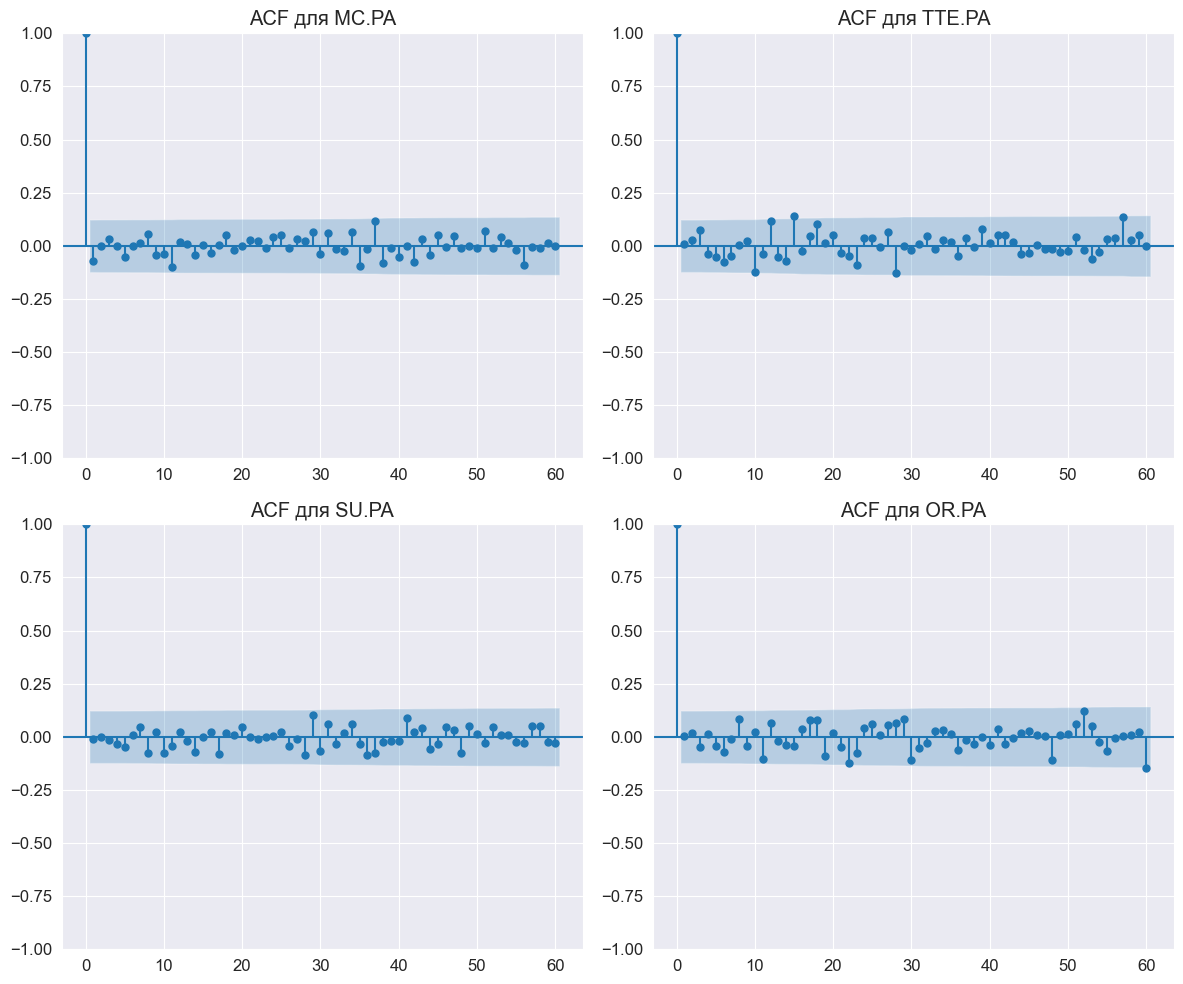

In [29]:
import statsmodels.api as sm

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

filtered_data = all_data[all_data['Ticker'].isin(tickers)]

for i, ticker in enumerate(tickers):
    ticker_data = filtered_data[filtered_data['Ticker'] == ticker]['log_return'].dropna()
    sm.graphics.tsa.plot_acf(ticker_data, lags=60, ax=axes[i])
    axes[i].set_title(f'ACF для {ticker}') 

plt.tight_layout()
plt.show()

Для всех четырех тикеров можно заметить, что временные ряды логарифмических доходностей не проявляют значительной автокорреляции для лагов $\le60$ на уровне значимости $0.05$, что может свидетельствовать об отсутствии значимой зависимости между временными периодами.

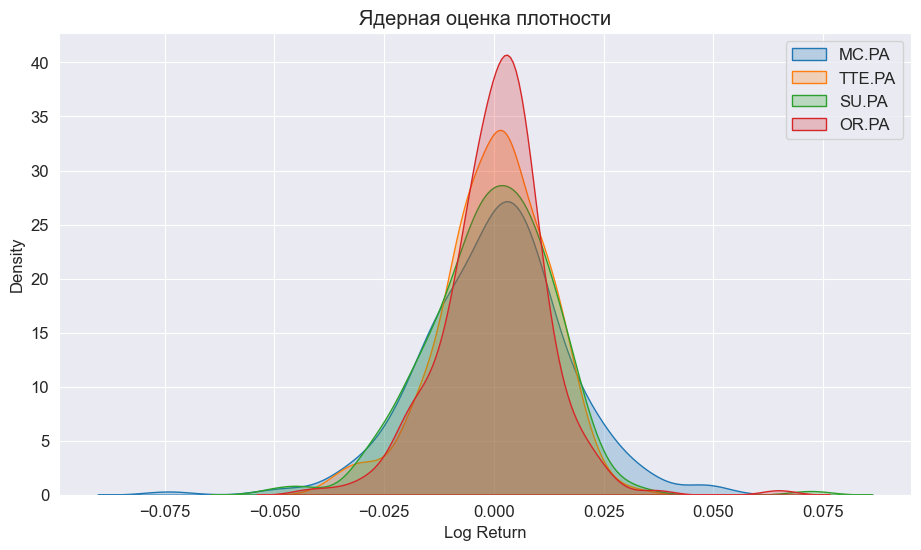

In [21]:
plt.figure(figsize=(11, 6))

# Ядерная оценка плотности
for ticker in tickers:
    sns.kdeplot(filtered_data[filtered_data['Ticker'] == ticker]['log_return'], label=ticker, fill=True)

plt.title('Ядерная оценка плотности')
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.legend()
plt.show()

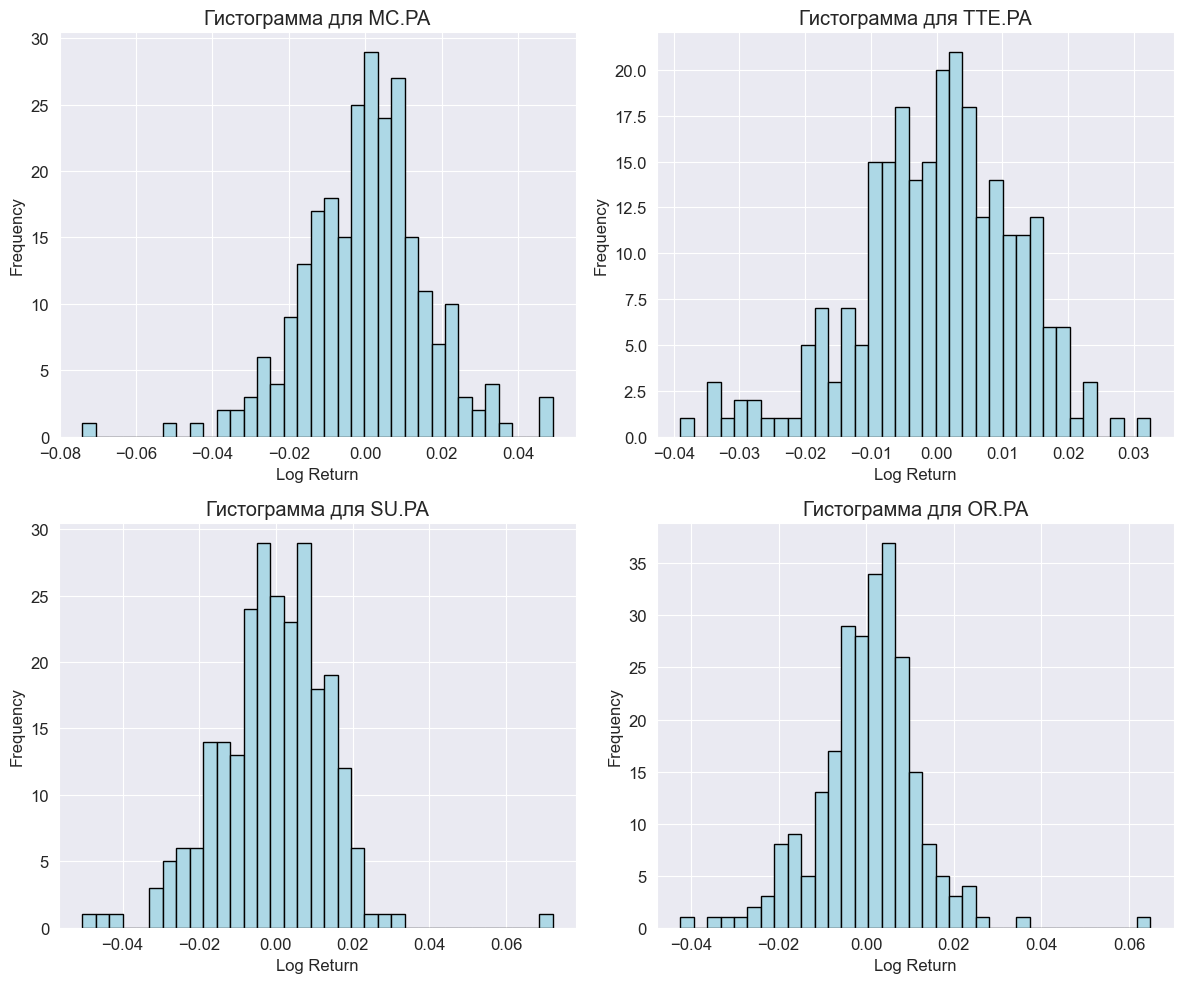

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Гистограммы
for i, ticker in enumerate(tickers):
    ticker_data = filtered_data[filtered_data['Ticker'] == ticker]['log_return'].dropna()
    axes[i].hist(ticker_data, bins=35, color='lightblue', edgecolor='black')
    axes[i].set_title(f'Гистограмма для {ticker}')
    axes[i].set_xlabel('Log Return')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Исходя из графиков, можно предположить, что распределения доходностей каждого выбранного актива подчиняются нормальному закону. \
Проведем статистические тесты со следующей нулевой гипотезой $H_0$:\
$H_0$ - дневные доходности подчиняются нормальному закону

In [23]:
from scipy import stats
from scipy.stats import kstest

In [24]:
# Тест Колмогорова-Смирнова, уровень значимости = 0.05
for ticker in tickers:
    data = all_data[all_data['Ticker'] == ticker]['log_return'].dropna()
    data_standardized = (data - np.mean(data)) / np.std(data)
    stat, p_value = kstest(data_standardized, 'norm')
    print(f'Значение статистики для {ticker}: {stat}, p-value: {p_value}')
    if p_value > 0.05:
        print("Доходности могут быть нормальными (не отвергаем H₀)\n")
    else:
        print("Доходности не нормальны (отвергаем H₀)\n")

Значение статистики для MC.PA: 0.04634311060887547, p-value: 0.6316771965897219
Доходности могут быть нормальными (не отвергаем H₀)

Значение статистики для TTE.PA: 0.05154541384545053, p-value: 0.4959766799872819
Доходности могут быть нормальными (не отвергаем H₀)

Значение статистики для SU.PA: 0.054056152675681424, p-value: 0.4352998230081001
Доходности могут быть нормальными (не отвергаем H₀)

Значение статистики для OR.PA: 0.07359074720932246, p-value: 0.12277726720217874
Доходности могут быть нормальными (не отвергаем H₀)



Согласно тесту Колмогорова-Смирнова, на уровне значимости $0.05$ гипотеза о нормальном распределении данных не отвергается

## Анализ корреляций доходностей активов по некоторым секторам

In [25]:
def plot_correlation_heatmap(tickers, all_data, sector_name):
    plt.figure(figsize=(12, 7)) 
    log_returns = {}

    for ticker in tickers:
        log_returns[ticker] = all_data[all_data['Ticker'] == ticker]['log_return'].dropna().reset_index(drop=True)

    df = pd.DataFrame(log_returns)

    correlation_matrix = df.corr()

    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title(f'{sector_name}')
    plt.show()

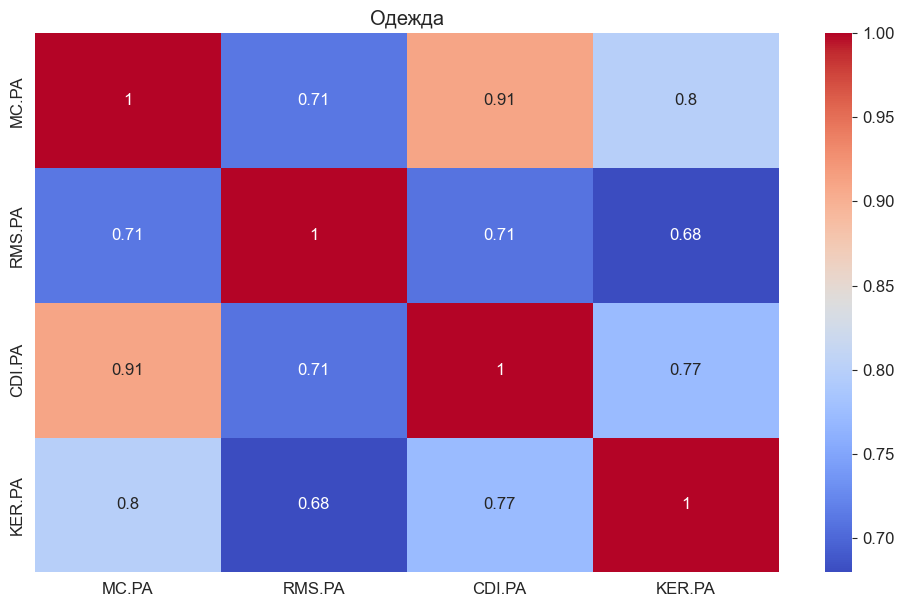

In [26]:
clothing_tickers = ['MC.PA', 'RMS.PA', 'CDI.PA', 'KER.PA']
plot_correlation_heatmap(clothing_tickers, all_data, 'Одежда')

Видно, что ежедневные доходности акций компаний, занимающихся созданием и продажей одежды достаточно сильно коррелируют между собой

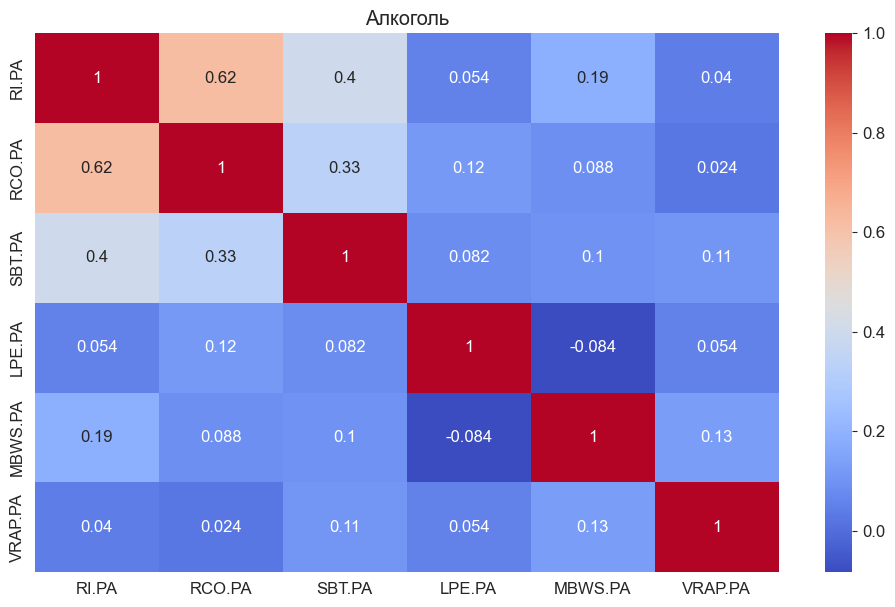

In [27]:
alcohol_tickers = ['RI.PA', 'RCO.PA', 'SBT.PA', 'LPE.PA', 'MBWS.PA', 'VRAP.PA']
plot_correlation_heatmap(alcohol_tickers, all_data, 'Алкоголь')

Доходности акций компаний из алкогольного сектора коррелируют слабо

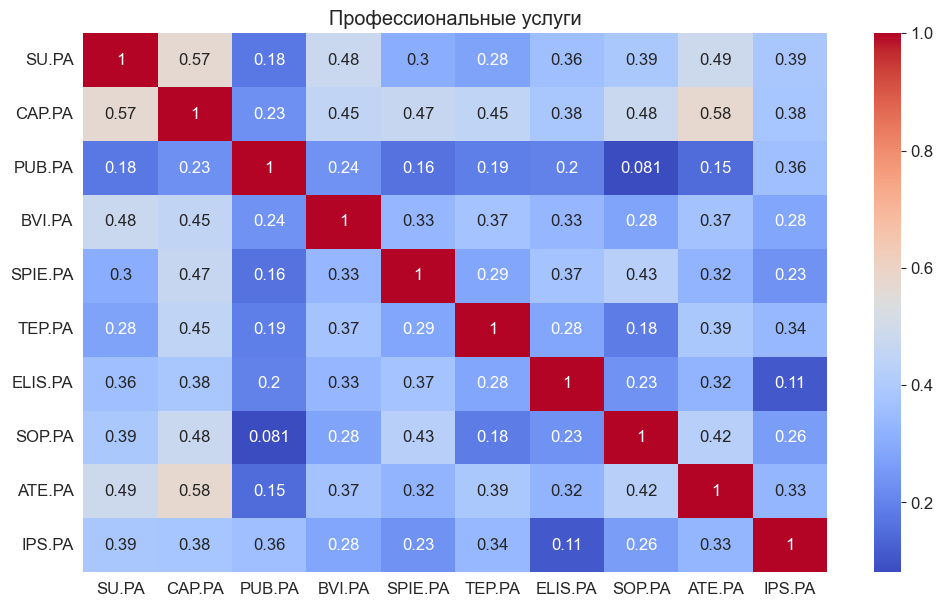

In [28]:
prof_services_tickers = ['SU.PA', 'CAP.PA', 'PUB.PA', 'BVI.PA', 'SPIE.PA', 'TEP.PA', 'ELIS.PA', 'SOP.PA', 'ATE.PA', 'IPS.PA']
plot_correlation_heatmap(prof_services_tickers, all_data, 'Профессиональные услуги')

Доходности акций компаний из сферы профессиональных услуг коррелируют слабо